In [1]:
import sys
sys.path.append('src')
from metrics import *
import matplotlib.pyplot as plt

data = ladda_data()
print(f"Dataset storlek: {data.shape}")
print(f"Kolumner: {list(data.columns)}")
data.head()

CSV-fil inte hittad. Skapar testdata...
Dataset storlek: (800, 9)
Kolumner: ['id', 'age', 'sex', 'height', 'weight', 'systolic_bp', 'cholesterol', 'smoker', 'disease']


,id,age,sex,height,weight,systolic_bp,cholesterol,smoker,disease
0,1,57,M,163,67,128,3.735502,Yes,0
1,2,47,F,179,78,160,3.206894,Yes,0
2,3,59,M,170,68,109,4.617183,Yes,0
3,4,72,F,172,74,100,4.876271,No,0
4,5,46,M,185,106,130,4.602320,No,0


### Deskriptiv statistik

In [2]:
stats = grundstatistik(data)
print("Deskriptiv statistik:")
stats

Deskriptiv statistik:


,Medel,Median,Min,Max,Standardavvikelse
age,49.43,50.00,18.0,90.0,14.50
weight,74.80,75.00,40.0,133.0,14.76
height,169.82,170.00,140.0,200.0,9.86
systolic_bp,139.47,140.00,100.0,200.0,20.13
cholesterol,4.94,4.95,2.0,8.0,0.98


###  Grafer


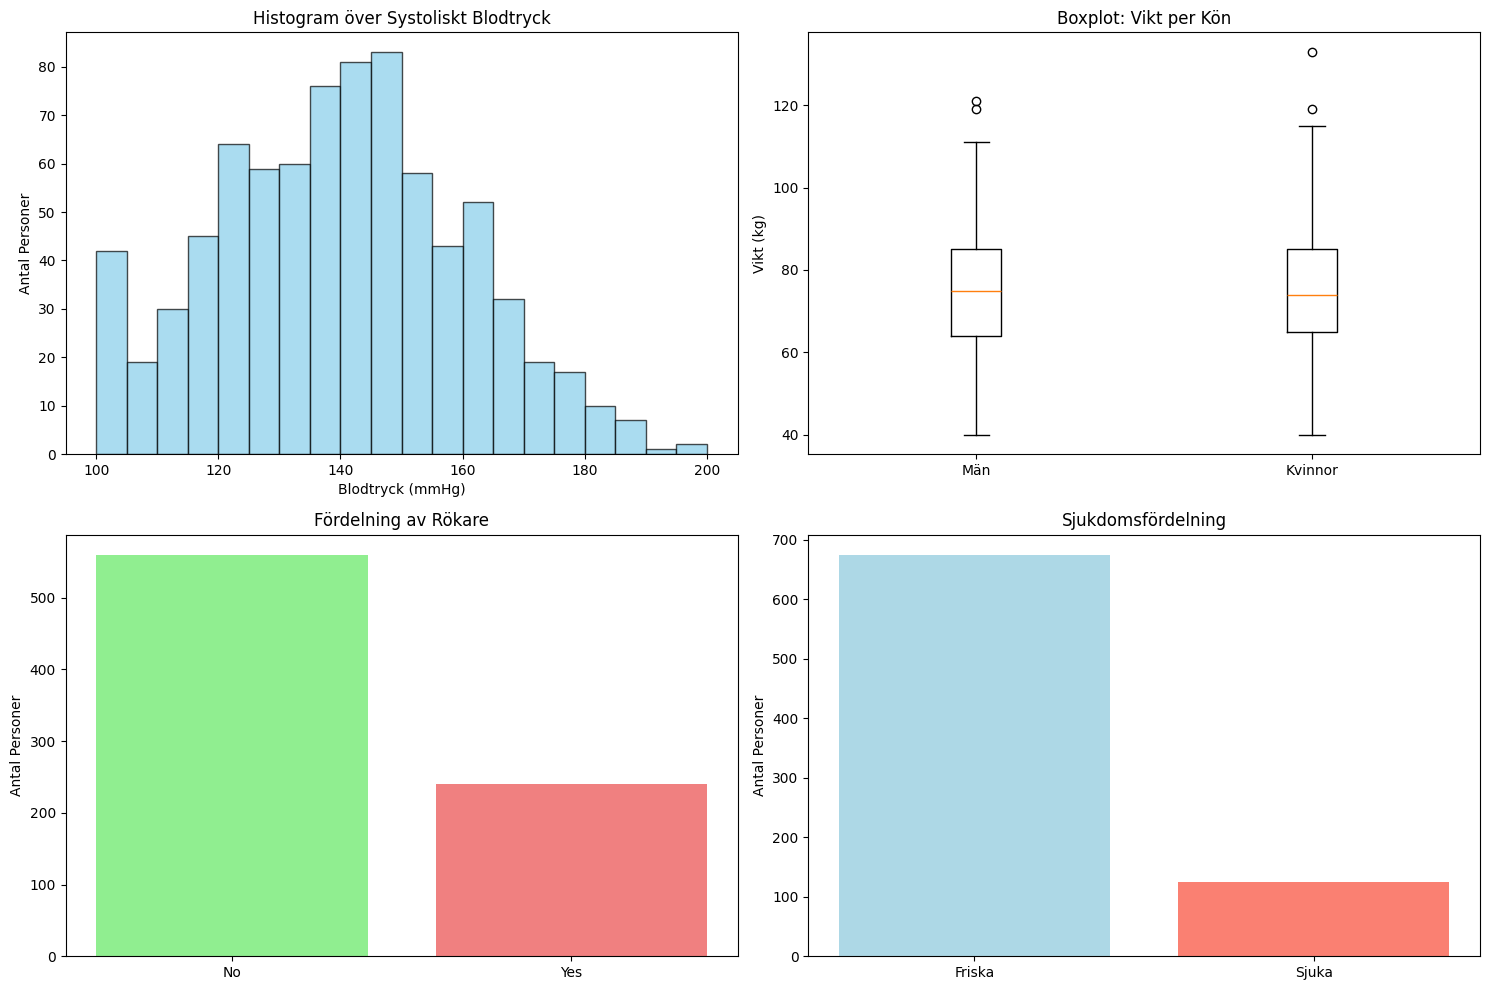

   3 grafer skapade:
1. Histogram över blodtryck
2. Boxplot över vikt per kön
3. Stapeldiagram över rökare
4. Extra: Stapeldiagram över sjukdom


In [ ]:
fig = skapa_grafer(data)
plt.show()

print("   4 grafer skapade:")
print("1. Histogram över blodtryck")
print("2. Boxplot över vikt per kön") 
print("3. Stapeldiagram över rökare")
print("4. Extra: Stapeldiagram över sjukdom")

### Simulering

Verklig andel sjuka: 0.156 (15.6%)
Simulerad andel sjuka: 0.157 (15.7%)
Skillnad: 0.0008


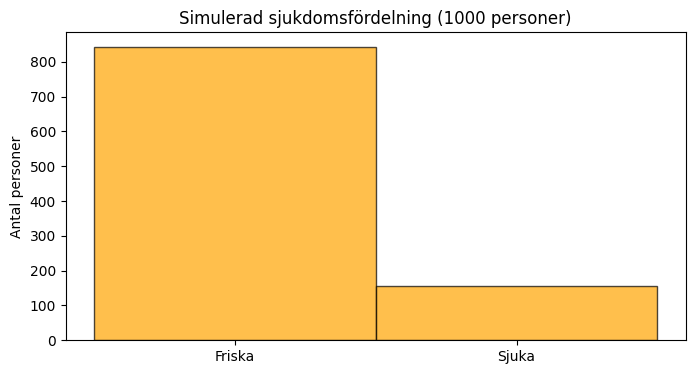

In [4]:
andel_orig, andel_sim, sim_data = simulera_sjukdom(data)
print(f"Verklig andel sjuka: {andel_orig:.3f} ({andel_orig*100:.1f}%)")
print(f"Simulerad andel sjuka: {andel_sim:.3f} ({andel_sim*100:.1f}%)")
print(f"Skillnad: {abs(andel_orig - andel_sim):.4f}")

plt.figure(figsize=(8, 4))
plt.hist(sim_data, bins=2, alpha=0.7, color='orange', edgecolor='black')
plt.xticks([0.25, 0.75], ['Friska', 'Sjuka'])
plt.ylabel('Antal personer')
plt.title('Simulerad sjukdomsfördelning (1000 personer)')
plt.show()

### Konfidensintervall 

Medelblodtryck: 139.5 mmHg
95% konfidensintervall: [138.1, 140.9] mmHg


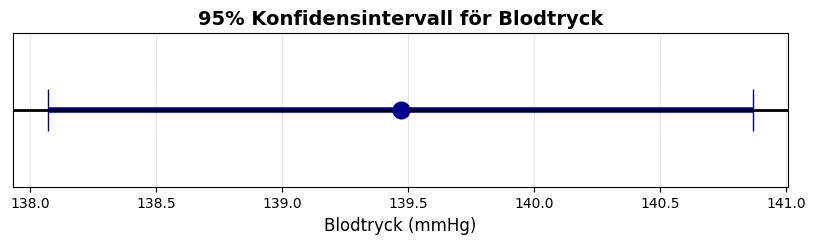

In [5]:
medel, undre, ovre = konfidensintervall(data)
print(f"Medelblodtryck: {medel:.1f} mmHg")
print(f"95% konfidensintervall: [{undre:.1f}, {ovre:.1f}] mmHg")

plt.figure(figsize=(10, 2))
plt.errorbar(medel, 0, xerr=[[medel - undre], [ovre - medel]], 
             fmt='o', capsize=15, markersize=12, color='darkblue', linewidth=4)
plt.axhline(y=0, color='black', linewidth=2)
plt.title('95% Konfidensintervall för Blodtryck', fontsize=14, fontweight='bold')
plt.xlabel('Blodtryck (mmHg)', fontsize=12)
plt.yticks([])
plt.grid(True, alpha=0.3)
plt.show()

### Hypotesprövning

Hypotes: Rökare har högre blodtryck
Rökare: 139.0 mmHg
Icke-rökare: 139.7 mmHg
Skillnad: -0.7 mmHg
P-värde: 0.6766
Ingen signifikant skillnad


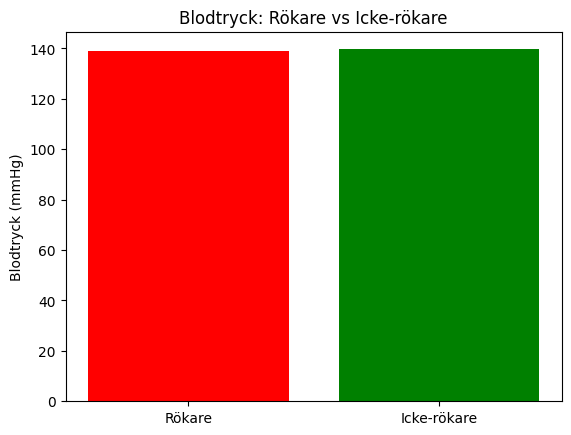

In [6]:
rok_medel, icke_medel, p_varde, t_stat = hypotesprov(data)
skillnad = rok_medel - icke_medel

print("Hypotes: Rökare har högre blodtryck")
print(f"Rökare: {rok_medel:.1f} mmHg")
print(f"Icke-rökare: {icke_medel:.1f} mmHg")
print(f"Skillnad: {skillnad:.1f} mmHg")
print(f"P-värde: {p_varde:.4f}")

if p_varde < 0.05:
    print("Signifikant skillnad")
else:
    print("Ingen signifikant skillnad")

plt.bar(['Rökare', 'Icke-rökare'], [rok_medel, icke_medel], color=['red', 'green'])
plt.ylabel('Blodtryck (mmHg)')
plt.title('Blodtryck: Rökare vs Icke-rökare')
plt.show()